In [638]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

In [639]:
df_orig = pd.read_csv('data/final.csv')

In [640]:
round((df_orig.isna().sum() / len(df_orig)) * 100, 1)

Unnamed: 0                     0.0
customer_id                    0.0
age                            1.0
gender_cd                      1.4
region_size                   39.0
foreign_flg                   39.0
entrepreneur_flg              39.0
auto_flg                      39.0
traveler_flg                  39.0
partnership_flg               39.0
child_amt                     39.0
realty_type                   39.0
segment_cd                    39.0
bundle_nm                     74.8
confirmed_income              92.5
predicted_income              78.1
product_cd                     0.0
functional_cd                  0.0
finish_dttm                    0.0
state_talk_time_sec            0.8
wo_hit_status_result_desc      0.0
wo_hit_status_reason_desc      0.0
employee_id                    0.0
emp_age                        0.0
emp_age_new                    0.0
emp_gender_cd                 11.7
emp_children_cnt              99.5
emp_work_months_cnt            9.5
emp_citizenship_coun

In [641]:
df = pd.read_csv('data\data_final_preprocessed.csv')

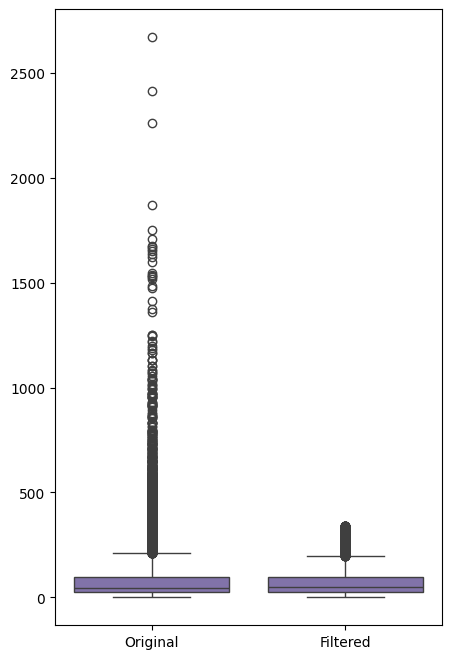

In [642]:
df_combined = pd.DataFrame({
    'Original': df_orig['state_talk_time_sec'],
    'Filtered': df['state_talk_time_sec']
})

# Создаем боксплот
plt.figure(figsize=(5, 8))
sns.boxplot(data=df_combined, color='#7C6AB2')

# Убираем подписи осей
plt.xlabel('')
plt.ylabel('')

# Показываем график
plt.title('')
plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()

In [643]:
df["marital_status"].value_counts()

marital_status
с партнером без детей    4964
с партнером с детьми     2549
одинокий                 1753
одинокий с детьми         251
Name: count, dtype: int64

In [644]:
portret_data = df[(df["gender_cd"] == 1)&(df["auto_and_entrepreneur_flg"] == 0)&(df["realty_type"] =="Нет своего жилья")&(df["marital_status"].isin(["одинокий с детьми", "с партнером с детьми"]))]
portret_data["success_flg"].mean()

nan

In [645]:
portret_data.shape

(0, 42)

In [646]:
portret_data = df[(df["gender_cd"] == 1)&(df["auto_flg"] == 0)&(df["realty_type"] == "Нет своего жилья")&(df["marital_status"].isin(["одинокий с детьми"]))]
portret_data["success_flg"].mean()

nan

In [647]:
portret_data.shape

(0, 42)

In [648]:
portret_data = df[(df["gender_cd"] == 1)&(df["auto_flg"] == 0)&(df["realty_type"] == "Нет своего жилья")&(df["pro_flg"] == 0)]
portret_data["success_flg"].mean()

nan

In [649]:
portret_data.shape

(0, 42)

In [650]:
df.groupby(["product", "pro_flg"])["success_flg"].value_counts().reset_index()

,product,pro_flg,success_flg,count
0,Дебетовая карта,0,1,243
1,Дебетовая карта,0,0,227
2,Дебетовая карта,1,1,52
3,Дебетовая карта,1,0,49
4,Инвестиции,0,0,313
5,Инвестиции,0,1,19
6,Инвестиции,1,0,221
7,Инвестиции,1,1,4
8,Кредит,0,0,1143
9,Кредит,0,1,117


In [651]:
df.shape

(9517, 42)

In [652]:
df["foreign_flg"].value_counts()

foreign_flg
0.0    9443
1.0      74
Name: count, dtype: int64

In [653]:
df.isna().sum()

customer_id                      0
age                              0
gender_cd                        0
region_size                      0
foreign_flg                      0
entrepreneur_flg                 0
auto_flg                         0
traveler_flg                     0
partnership_flg                  0
child_amt                        0
realty_type                      0
segment_cd                       0
bundle_nm                        0
confirmed_income              8553
predicted_income              6836
product_cd                       0
functional_cd                    0
finish_dttm                      0
state_talk_time_sec              0
wo_hit_status_result_desc        0
wo_hit_status_reason_desc        0
employee_id                      0
emp_age                          0
emp_age_new                      0
emp_gender_cd                 1002
emp_children_cnt              9478
emp_work_months_cnt            870
emp_citizenship_country_cd    8618
emp_marital_status_c

In [654]:
df['region_category'].value_counts()

region_category
1    8604
0     913
Name: count, dtype: int64

In [655]:
df['auto_and_entrepreneur'].value_counts()

KeyError: 'auto_and_entrepreneur'

In [ ]:
df['auto_and_entrepreneur'].isna().sum()

0

<Axes: xlabel='age_group', ylabel='Count'>

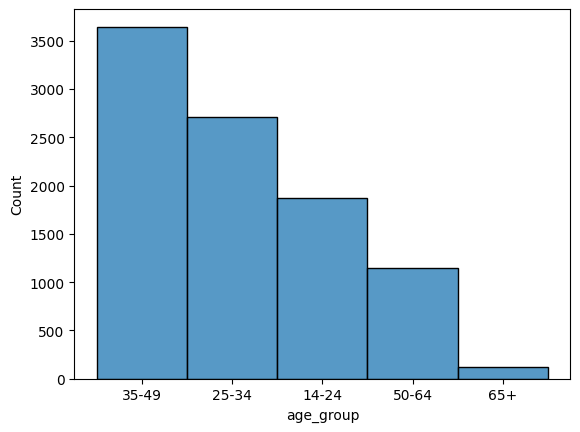

In [ ]:
sns.histplot(df['age_group'])

In [ ]:
df['marital_status'].isna().sum()

0

In [ ]:
df.groupby("product")["age"].mean()

product
Дебетовая карта         35.228021
Инвестиции              36.261181
Кредит                  36.380866
Кредитная карта         36.747894
Страхование и услуги    37.431298
Name: age, dtype: float64

In [ ]:
import pandas as pd
from scipy.stats import fisher_exact
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['pro_flg'], df['success_flg'])
print("Contingency Table:")
print(contingency_table)

# Выполняем хи-квадрат тест
stat, p_value = fisher_exact(contingency_table)

# Вывод результатов хи-квадрат теста
print("\nChi-Square Test Results:")
print(f"P-value: {p_value}")
print(stat)

Contingency Table:
success_flg     0    1
pro_flg               
0            5466  800
1            2975  285

Chi-Square Test Results:
P-value: 2.5182537071978957e-09
0.6545420168067226


In [ ]:
results = []

# Группировка данных по продуктам
for product, group in df.groupby('product'):
    contingency_table = pd.crosstab(group['bundle_nm'], group['success_flg'])

    # Проверка, достаточно ли данных для проведения теста
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        # Если данных недостаточно, добавляем результат с указанием на отсутствие данных
        results.append({
            'product': product,
            'test': 'Нет данных',
            'p_value': None,
            'significant': None
        })
        continue

    # Проверка на минимальное значение в контингентной таблице
    if contingency_table.values.min() < 5:
        # Если минимальное значение меньше 5, используем тест Фишера
        stat, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'  # Указываем тип теста
    else:
        # В противном случае используем критерий хи-квадрат
        stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_type = 'Chi2'  # Указываем тип теста

    # Добавление результатов теста в список
    results.append({
        'product': product,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05  # Определяем, является ли результат статистически значимым
    })

results_df = pd.DataFrame(results)

results_df

,product,test,p_value,significant
0,Дебетовая карта,Chi2,1.000000,False
1,Инвестиции,Fisher,0.028215,True
2,Кредит,Chi2,0.000780,True
3,Кредитная карта,Chi2,0.014190,True
4,Страхование и услуги,Chi2,0.831428,False


In [ ]:
df = pd.read_csv('data\data_final_preprocessed.csv')
df = df[df['function'] == 'Продажи и предложения']
df[df["product"] == "Дебетовая карта"]["functional_cd"].value_counts()

functional_cd
Utilization    197
Cold            66
BAF             23
Name: count, dtype: int64

In [ ]:
df[df["product"] == "Дебетовая карта"].groupby("functional_cd")[["age", "gender_cd", "pro_flg"]].mean()

,age,gender_cd,pro_flg
functional_cd,,,
BAF,36.739130,0.478261,0.173913
Cold,40.548485,0.393939,0.060606
Utilization,36.522843,0.497462,0.142132


In [ ]:
from scipy.stats import levene
group1 = df[(df["product"] == "Дебетовая карта") & (df["functional_cd"] == "Utilization")]["age"]
group2 = df[(df["product"] == "Дебетовая карта") & (df["functional_cd"] == "Cold")]["age"]
stat, p = levene(group1, group2)
print('p-value:', p)

p-value: 0.021490109231473997


In [ ]:
from scipy.stats import f_oneway

group1 = df[(df["product"] == "Дебетовая карта") & (df["functional_cd"] == "BAF")]["age"]
group2 = df[(df["product"] == "Дебетовая карта") & (df["functional_cd"] == "Cold")]["age"]
group3 = df[(df["product"] == "Дебетовая карта") & (df["functional_cd"] == "Utilization")]["age"]

# Выполнение ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

print('F-статистика:', f_statistic)
print('p-значение:', p_value)


F-статистика: 2.5285356544911077
p-значение: 0.0815768801526305


In [ ]:
df[df["product"] == "Кредит"]["functional_cd"].value_counts()

functional_cd
Upsell         863
Preapprove     748
Refinancing      1
Name: count, dtype: int64

In [ ]:
df[(df["product"] == "Кредит") & (df["functional_cd"].isin(["Upsell", "Preapprove"]))].groupby("functional_cd")[["age", "gender_cd", "pro_flg"]].mean()

,age,gender_cd,pro_flg
functional_cd,,,
Preapprove,39.240642,0.473262,0.469251
Upsell,34.097335,0.579374,0.382387


In [ ]:
from scipy.stats import levene
group1 = df[(df["product"] == "Кредит") & (df["functional_cd"] == "Preapprove")]["age"]
group2 = df[(df["product"] == "Кредит") & (df["functional_cd"] == "Upsell")]["age"]
stat, p = levene(group1, group2)
print('p-value:', p)

p-value: 0.005835784943008458


In [ ]:
from scipy.stats import bartlett
stat, p = bartlett(df[(df["product"] == "Кредит") & (df["functional_cd"] == "Preapprove")]["age"], df[(df["product"] == "Кредит") & (df["functional_cd"] == "Upsell")]["age"])
print('p-value:', p)

p-value: 0.004242973720999711


<Axes: xlabel='functional_cd', ylabel='age'>

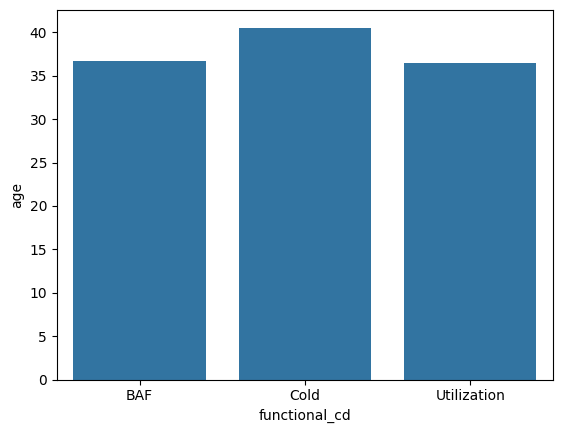

In [ ]:
sns.barplot(df[df["product"] == "Дебетовая карта"].groupby("functional_cd")["age"].mean())

<Axes: xlabel='functional_cd', ylabel='age'>

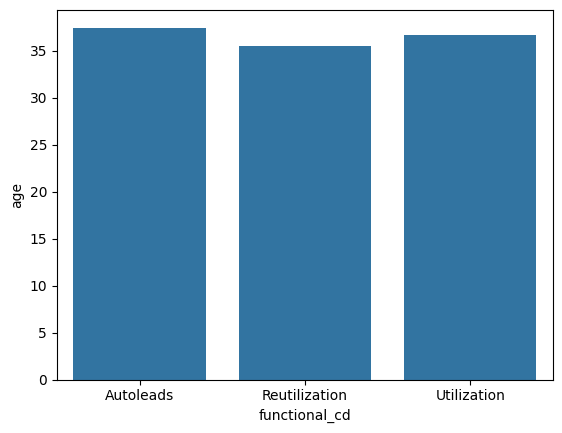

In [ ]:
sns.barplot(df[df["product"] == "Инвестиции"].groupby("functional_cd")["age"].mean())

([0, 1, 2],
 [Text(0, 0, 'Preapprove'), Text(1, 0, 'Refinancing'), Text(2, 0, 'Upsell')])

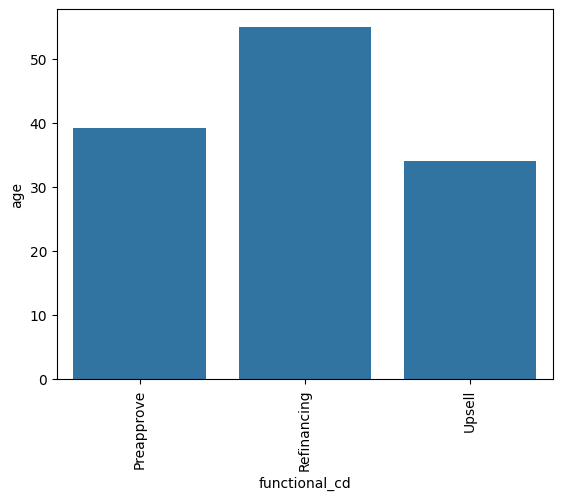

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(df[df["product"] == "Кредит"].groupby("functional_cd")["age"].mean())
plt.xticks(rotation=90)

<Axes: xlabel='functional_cd', ylabel='age'>

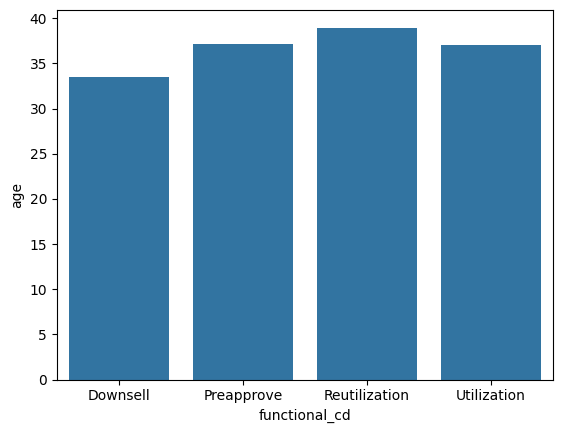

In [ ]:
sns.barplot(df[df["product"] == "Кредитная карта"].groupby("functional_cd")["age"].mean())

<Axes: xlabel='functional_cd', ylabel='age'>

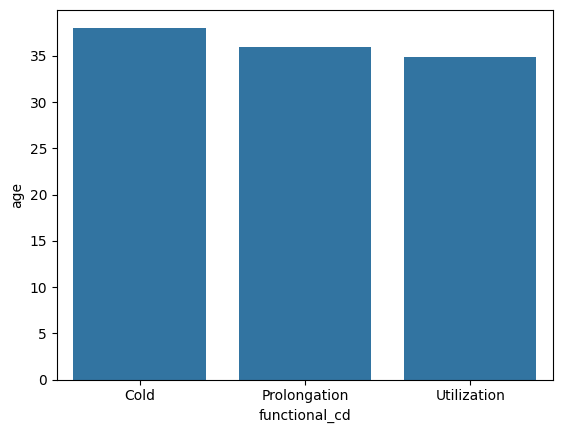

In [ ]:
sns.barplot(df[df["product"] == "Страхование и услуги"].groupby("functional_cd")["age"].mean())

In [ ]:
df.columns

Index(['customer_id', 'age', 'gender_cd', 'region_size', 'foreign_flg',
       'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg',
       'child_amt', 'realty_type', 'segment_cd', 'bundle_nm',
       'confirmed_income', 'predicted_income', 'product_cd', 'functional_cd',
       'finish_dttm', 'state_talk_time_sec', 'wo_hit_status_result_desc',
       'wo_hit_status_reason_desc', 'employee_id', 'emp_age', 'emp_age_new',
       'emp_gender_cd', 'emp_children_cnt', 'emp_work_months_cnt',
       'emp_citizenship_country_cd', 'emp_marital_status_cd', 'success_flg',
       'day_of_week', 'holiday_flg', 'million_city', 'product', 'function',
       'auto_and_entrepreneur', 'region_category', 'age_group',
       'age_difference', 'marital_status', 'work_experience_status',
       'pro_flg'],
      dtype='object')

In [ ]:
df[['pro_flg', 'age', 'gender_cd', 'state_talk_time_sec', 'child_flg', 'holiday_flg']].isna().sum()

KeyError: "['child_flg'] not in index"

In [ ]:
df = pd.read_csv('data/data_final_preprocessed.csv')

X = df[['pro_flg', 'age', 'gender_cd', 'state_talk_time_sec', 'child_flg', 'holiday_flg']]
y = df['success_flg']

model = sm.Logit(y, X)
model_result = model.fit()

print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.255031
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            success_flg   No. Observations:                15080
Model:                          Logit   Df Residuals:                    15074
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1026
Time:                        18:29:16   Log-Likelihood:                -3845.9
converged:                       True   LL-Null:                       -4285.4
Covariance Type:            nonrobust   LLR p-value:                8.987e-188
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
pro_flg                -0.7955      0.077    -10.369      0.000      -0.946      -0.645
ag

In [ ]:
df = pd.read_csv('data\data_final_preprocessed.csv')
df['pro_flg'] = df['pro_flg'].map({1: 1, 0: -1})
for col in df['product'].unique():
    df1 = df[df['product'] == col]
    X = df1[['pro_flg', 'age', 'gender_cd', 'state_talk_time_sec', 'child_flg', 'holiday_flg']]
    y = df1['success_flg']
    X = sm.add_constant(X)
    print(f'----------------------------{col}----------------------------')
    model = sm.Logit(y, X)
    model_result = model.fit()
    print(model_result.summary())

----------------------------Кредит----------------------------
Optimization terminated successfully.
         Current function value: 0.111275
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            success_flg   No. Observations:                 2612
Model:                          Logit   Df Residuals:                     2605
Method:                           MLE   Df Model:                            6
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.3253
Time:                        18:29:16   Log-Likelihood:                -290.65
converged:                       True   LL-Null:                       -430.76
Covariance Type:            nonrobust   LLR p-value:                 1.412e-57
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.5

In [ ]:
# список для хранения результатов тестирования
results = []
df = pd.read_csv('data\data_final_preprocessed.csv')
# Группировка данных по продуктам
for product, group in df.groupby('product'):
    contingency_table = pd.crosstab(group['bundle_nm'], group['success_flg'])

    # Проверка, достаточно ли данных для проведения теста
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        # Если данных недостаточно, добавляем результат с указанием на отсутствие данных
        results.append({
            'product': product,
            'test': 'Нет данных',
            'p_value': None,
            'significant': None
        })
        continue

    # Проверка на минимальное значение в контингентной таблице
    if contingency_table.values.min() < 5:
        # Если минимальное значение меньше 5, используем тест Фишера
        stat, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'  # Указываем тип теста
    else:
        # В противном случае используем критерий хи-квадрат
        stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_type = 'Chi2'  # Указываем тип теста

    # Добавление результатов теста в список
    results.append({
        'product': product,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05  # Определяем, является ли результат статистически значимым
    })

results_df = pd.DataFrame(results)

results_df

,product,test,p_value,significant
0,Дебетовая карта,Chi2,0.000013,True
1,Инвестиции,Fisher,0.009625,True
2,Кредит,Chi2,0.016884,True
3,Кредитная карта,Chi2,0.162231,False
4,Страхование и услуги,Chi2,0.402468,False


In [ ]:
df = df[df["functional_cd"].isin(["Cold", "Upsell", "Downsell", "BAF", "Personal accident Insurance", "Deposit", "Refinancing", "Prolongation", "Preapprove"])]

In [ ]:
df.groupby("product")["age"].mean()

product
Дебетовая карта         42.227652
Кредит                  37.170036
Кредитная карта         39.095582
Страхование и услуги    38.991556
Name: age, dtype: float64

In [ ]:
df[df["product"] == "Дебетовая карта"].groupby("functional_cd")["age"].mean()

functional_cd
BAF     40.180328
Cold    42.495075
Name: age, dtype: float64

In [ ]:
df.groupby('pro_flg')['success_flg'].mean()

pro_flg
0    0.028784
1    0.027455
Name: success_flg, dtype: float64

In [ ]:
df['product'].unique()

array(['Кредитная карта', 'Кредит', 'Дебетовая карта',
       'Страхование и услуги'], dtype=object)

In [ ]:
from statsmodels.stats.multitest import multipletests

# список для хранения результатов тестирования
results = []

# Группировка данных по продуктам
for product, group in df.groupby('product'):
    contingency_table = pd.crosstab(group['bundle_nm'], group['success_flg'])

    # Проверка, достаточно ли данных для проведения теста
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        # Если данных недостаточно, добавляем результат с указанием на отсутствие данных
        results.append({
            'product': product,
            'test': 'Нет данных',
            'p_value': None,
            'significant': None
        })
        continue 

    # Проверка на минимальное значение в контингентной таблице
    if contingency_table.values.min() < 5:
        # Если минимальное значение меньше 5, используем тест Фишера
        stat, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        test_type = 'Fisher'  # Указываем тип теста
    else:
        # В противном случае используем критерий хи-квадрат
        stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
        test_type = 'Chi2'  # Указываем тип теста

    # Добавление результатов теста в список
    results.append({
        'product': product,
        'test': test_type,
        'p_value': p_value,
        'significant': p_value < 0.05  # Определяем, является ли результат статистически значимым
    })

results_df = pd.DataFrame(results)

# Применение поправки (например, метод Холма)
adjusted_p_values = multipletests(results_df['p_value'], method='bonferroni')[1]

# Добавление скорректированных p-значений в DataFrame
results_df['adjusted_p_value'] = adjusted_p_values
results_df['significant_after_correction'] = results_df['adjusted_p_value'] < 0.05


results_df


,product,test,p_value,significant,adjusted_p_value,significant_after_correction
0,Дебетовая карта,Fisher,0.019278,True,0.077111,False
1,Кредит,Chi2,0.016383,True,0.065532,False
2,Кредитная карта,Chi2,1.000000,False,1.000000,False
3,Страхование и услуги,Chi2,0.390443,False,1.000000,False


In [ ]:
d = df.groupby(['product', 'pro_flg'])['success_flg'].agg(mean='mean', count='count')
d[d['count'] > 30]

mean  count
product              pro_flg                 
Дебетовая карта      0        0.015504    516
Кредит               0        0.031707   1230
                     1        0.012876    699
Кредитная карта      0        0.027259   5833
                     1        0.027665   1229
Страхование и услуги 0        0.048387    620
                     1        0.066986    209

Гипотеза подтвердилась для продуктов Debit and Investment. А для Credits и 	Insurance and Services - нет. Почему так могло произойти?\

Пользователи с подпиской Pro имеют лояльность к банку и осведомленность о его популярных пролуктах, поэтому они менее восприимчивы к предложениями о дебитовых картах и инвеситициям, ведь они и так знают про этти продукты и в случае чего сами придут к оформлению продукта

Модель для всего датасета(не по бакетам)

In [ ]:
from statsmodels.genmod import families
df = pd.read_csv('data\data_final_preprocessed.csv')

for col in df['product'].unique():
    df1 = df[df['product'] == col]
    X = df1[['pro_flg', 'age', 'state_talk_time_sec']]
    y = df1['success_flg']
    X = sm.add_constant(X)
    print(f'----------------------------{col}----------------------------')
    model = sm.GLM(y, X, family=families.Binomial())
    model_result = model.fit()
    print(model_result.summary())

----------------------------Кредит----------------------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:            success_flg   No. Observations:                 2612
Model:                            GLM   Df Residuals:                     2608
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -295.42
Date:                Sun, 15 Dec 2024   Deviance:                       590.84
Time:                        18:29:16   Pearson chi2:                 1.95e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.09844
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
from statsmodels.genmod import families

df = pd.read_csv('data\data_final_preprocessed.csv')
X = df[['pro_flg', 'age', 'state_talk_time_sec']]
y = df['success_flg']
X = sm.add_constant(X)

model = sm.GLM(y, X, family=families.Binomial())
model_result = model.fit()

print(model_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            success_flg   No. Observations:                15080
Model:                            GLM   Df Residuals:                    15076
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3322.5
Date:                Sun, 15 Dec 2024   Deviance:                       6645.0
Time:                        18:29:16   Pearson chi2:                 1.17e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1199
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.9607    

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(df['success_flg'], model_result.predict())

0.8619338523214619

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,const,13.092173
1,pro_flg,1.012126
2,age,1.012515
3,state_talk_time_sec,1.003632


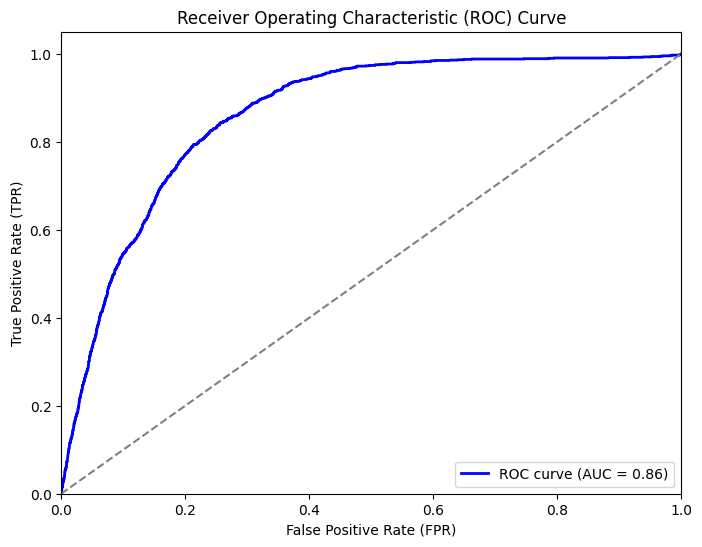

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities from the probit model
y_pred_prob = model_result.predict(X)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
